# Moving Average Convergence Divergence Demo

In this notebook, we will demonstrate how the moving average convergence divergence (MACD) tool works. We will plot exponential moving average (EMA) lines of different periods, and see how they can be used to produce a new metric that can predict a crossover event.

[Moving Averages on Wikipedia](https://en.wikipedia.org/wiki/Moving_average)

[MACD](https://en.wikipedia.org/wiki/MACD)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import functions from a separate file: macdHelperFunctions.py
from macdHelperFunctions import *


## MACD Functions

In [2]:
# Find the difference between the two EMAs. EMA(12) - EMA(26) = MACD
def getMACDonly(ema_short_data, ema_long_data, ema_long_period):
    result = ema_short_data - ema_long_data
    # for all initial values leading to the EMA_long_period, make zero.
    # This cleans up the initial "spin-up" error.
    result[0:ema_long_period] = 0
    return result

# Find the EMA(9) of the MACD. This is called the MACD_signal
#TODO Make this compatible with ingesting a numpy array.

# A Fully formed function to produce MACD will 
#accept 3 inputs(ema_short_period, ema_long_period, ema_signal_period)
def getMACD(signal_data, ema_short_period, ema_long_period, ema_signal_period):
    x = np.arange(len(signal_data))
    ema_short_data = getEMAdataset(signal_data, ema_short_period)
    ema_long_data  = getEMAdataset(signal_data, ema_long_period)
    MACD = getMACDonly(ema_short_data, ema_long_data, ema_long_period)
    MACD_signal = getEMAdataset(MACD, ema_signal_period)
    MACD_hist = MACD - MACD_signal
    return x, ema_short_data, ema_long_data, MACD, MACD_signal, MACD_hist

# The final data we want to produce is a bar chart where bar_height = MACD - MACD_signal

#signal_test = np.array([10, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13]) # 12 terms
#ema_short_period = 3
#ema_long_period = 6
#ema_signal_period = 5
#x, my_short_data, my_long_data, myMACD, myMACD_signal, myMACD_hist = getMACD(signal_test, ema_short_period, ema_long_period, ema_signal_period)

## Plotting Function

In [3]:
# MACD Plotter
def plotMACD(x, MACD_data, MACD_signal_data, macd_signal_period, MACD_hist, plot_x_start, plot_x_end):
    plt.plot(x, MACD_data, color='blue')
    plt.plot(x, MACD_signal_data, color='red')
    plt.bar(x, MACD_hist, color='black')
    #plt.axhline(y=0.0, color='k', linestyle='--')
    legend_text_1 = "MACD"   
    legend_text_2 = "MACD_signal(" + str(macd_signal_period) + ")"
    legend_text_3 = "MACD_hist"
    plt.legend([legend_text_1, legend_text_2, legend_text_3])
    plt.title("MACD and MACD_signal")
    plt.grid(b=True, which='major', color='gray', linestyle=':')
    plt.xlim((plot_x_start, plot_x_end))
    plt.show()

## Result Plots

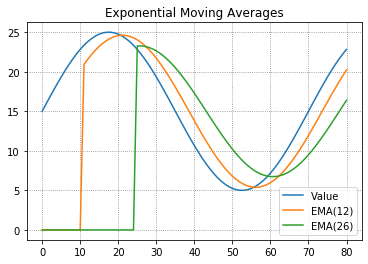

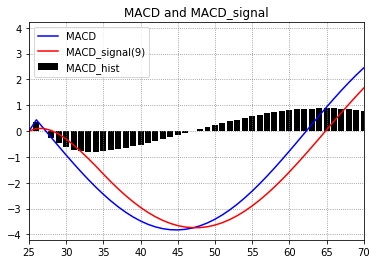

In [4]:
# Sine Wave Inputs
period = 70.0
amplitude = 20.0
sigma = 15.0
start = 0.0
end = 80.0
sineData = generateSineWave(period, amplitude, sigma, end)

# MACD Parameters
ema_short_period = 12
ema_long_period = 26
macd_signal_period = 9

# MACD Plotting Parameters
plot_x_start = 25
plot_x_end = 70

# Function Calls
calculateAndPlotEMA(sineData, ema_short_period, ema_long_period)
x, my_short_data, my_long_data, myMACD, myMACD_signal, myMACD_hist = getMACD(sineData, ema_short_period, ema_long_period, macd_signal_period)
plotMACD(x, myMACD, myMACD_signal, macd_signal_period, myMACD_hist, plot_x_start, plot_x_end)


In the figures above, we see the MACD(12) and MACD(26) following the value signal.

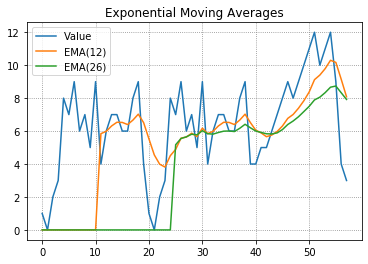

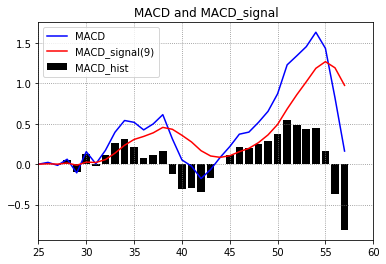

In [5]:
# Using some fictional data.
finalData = np.array([1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4, 
           1, 0, 2, 3, 8, 7, 9, 6, 7, 5, 9, 4, 6, 7, 7, 6, 6, 8, 9, 4,
           4, 5, 5, 6, 7, 8, 9, 8, 9, 10, 11, 12, 10, 11, 12, 9, 4, 3])

# MACD Parameters
ema_short_period = 12
ema_long_period = 26
macd_signal_period = 9


# MACD Plotting Parameters
plot_x_start = 25
plot_x_end = 60

# Function Calls
calculateAndPlotEMA(finalData, ema_short_period, ema_long_period)
x, my_short_data, my_long_data, myMACD, myMACD_signal, myMACD_hist = getMACD(finalData, ema_short_period, ema_long_period, macd_signal_period)
plotMACD(x, myMACD, myMACD_signal, macd_signal_period, myMACD_hist, plot_x_start, plot_x_end)


## Function Testing Suite

In [6]:
import unittest

class TestNotebook(unittest.TestCase):
           
    def test_getMACDonly(self):
        short_data = np.array([10, 11, 10, 12])
        long_data = np.array([8, 9, 9, 10])
        ema_long_period = 1
        answer = np.array([0, 2, 1, 2])
        MACD_test = getMACDonly(short_data, long_data, ema_long_period)
        self.assertTrue(np.allclose(MACD_test, answer, rtol=1e-05, atol=1e-08))

    def test_getMACD(self):
        print("hello world")

# Run the tests.
unittest.main(argv=[''], verbosity=2, exit=False)           

test_getMACD (__main__.TestNotebook) ... ok
test_getMACDonly (__main__.TestNotebook) ... 

hello world


ok

----------------------------------------------------------------------
Ran 2 tests in 0.001s

OK


In [7]:
# Testing Code

testData = [1, 0, 2, 3, 8]

test_bottom = getDenominator(3)
print("test_bottom:", test_bottom)

test_top = getNumerator(testData,2, 3)
print("test_top:", test_top)

test_alpha1 = calculateAlpha(9)
correctAns8 = 0.20
assert abs(test_alpha1 - correctAns8) < 0.001

short_data = np.array([10, 11, 10, 12])
long_data = np.array([8, 9, 9, 10])
ema_long_period = 1
MACD_test = getMACDonly(short_data, long_data, ema_long_period)
print("MACD_test:", MACD_test)


print("ALL TESTS PASSED.")


test_bottom: 1.75
test_top: 2.25
MACD_test: [0 2 1 2]
ALL TESTS PASSED.
